In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("laptop_price.csv", encoding='latin-1' )

In [3]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
df.rename(columns = ({"ScreenResolution": "ScreenR", "Price_euros": "Price"}), 
                inplace=True)

In [5]:
# Checking the data type
df.dtypes

laptop_ID      int64
Company       object
Product       object
TypeName      object
Inches       float64
ScreenR       object
Cpu           object
Ram           object
Memory        object
Gpu           object
OpSys         object
Weight        object
Price        float64
dtype: object

#have to changet the hyperparameter of "RAM" and "WEIGHT" they aren't dtype - objects

In [6]:
df["Ram"] = df["Ram"].str.replace("GB", "")
df["Weight"] = df["Weight"].str.replace("kg", "")

#some replacements
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [7]:
# apply the lambda function  to a single column. The function is applied to the ‘ScreenResolution’ column, 
#and a new columns ‘screen_width’ and 'screen_height' is formed with its help.
df['ScreenR'] = df.ScreenR.str.split(' ').apply(lambda x: x[-1])
df['screen_width'] = df.ScreenR.str.split('x').apply(lambda x: x[0]).astype(int)
df['screen_height'] = df.ScreenR.str.split('x').apply(lambda x: x[1]).astype(int)

df.drop(columns=['ScreenR'], inplace=True)

In [8]:
# Extract CPU brand and frequency from 'Cpu'
df['cpu_brand'] = df.Cpu.str.split(' ').apply(lambda x: x[0])
df['cpu_frequency'] = df.Cpu.str.split(' ').apply(lambda x: x[-1])

df.drop(columns=['Cpu'], inplace=True)

In [9]:
#changet the hyperparameter and remove GHz
df['cpu_frequency'] = df['cpu_frequency'].str[:-3].astype(float)

In [10]:
## Extract memory_amount and memory_type from 'memory'
df['memory_amount'] = df.Memory.str.split(' ').apply(lambda x: x[0])
df['memory_type'] = df.Memory.str.split(' ').apply(lambda x: x[1])

df.drop(columns=['Memory'], inplace=True)

In [11]:
# Standarize the 'Memory' values by converting them into MB (This process ensures that features are on the same scale.
def convert_memory_to_MB(value):
    if 'GB' in value:
        return float(value.rstrip('GB')) * 1000
    elif 'TB' in value:
        return float(value.rstrip('TB')) * 1000000

In [12]:
df['memory_amount'] = df['memory_amount'].apply(convert_memory_to_MB)

In [13]:
#create columns by brand 
df['gpu_brand'] = df['Gpu'].str.split(' ').apply(lambda x: x[0])

df.drop(columns=['Gpu'], inplace=True)

In [14]:
df = pd.get_dummies(df, columns=['cpu_brand', 'gpu_brand', 'memory_type'], dtype=int, drop_first=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   laptop_ID           1303 non-null   int64  
 1   Company             1303 non-null   object 
 2   Product             1303 non-null   object 
 3   TypeName            1303 non-null   object 
 4   Inches              1303 non-null   float64
 5   Ram                 1303 non-null   int32  
 6   OpSys               1303 non-null   object 
 7   Weight              1303 non-null   float32
 8   Price               1303 non-null   float64
 9   screen_width        1303 non-null   int32  
 10  screen_height       1303 non-null   int32  
 11  cpu_frequency       1303 non-null   float64
 12  memory_amount       1303 non-null   float64
 13  cpu_brand_Intel     1303 non-null   int32  
 14  cpu_brand_Samsung   1303 non-null   int32  
 15  gpu_brand_ARM       1303 non-null   int32  
 16  gpu_br

In [16]:
df.shape

(1303, 21)

In [17]:
df.isnull().sum()

laptop_ID             0
Company               0
Product               0
TypeName              0
Inches                0
Ram                   0
OpSys                 0
Weight                0
Price                 0
screen_width          0
screen_height         0
cpu_frequency         0
memory_amount         0
cpu_brand_Intel       0
cpu_brand_Samsung     0
gpu_brand_ARM         0
gpu_brand_Intel       0
gpu_brand_Nvidia      0
memory_type_HDD       0
memory_type_Hybrid    0
memory_type_SSD       0
dtype: int64

In [18]:
df.duplicated().sum()

0

In [19]:
df.describe()

,laptop_ID,Inches,Ram,Weight,Price,screen_width,screen_height,cpu_frequency,memory_amount,cpu_brand_Intel,cpu_brand_Samsung,gpu_brand_ARM,gpu_brand_Intel,gpu_brand_Nvidia,memory_type_HDD,memory_type_Hybrid,memory_type_SSD
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1.303000e+03,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,8.382195,2.038734,1123.686992,1894.784344,1070.830391,2.298772,4.426155e+05,0.951650,0.000767,0.000767,0.554106,0.306984,0.287797,0.007675,0.646969
std,381.172104,1.426304,5.084665,0.665475,699.009043,494.641028,284.519410,0.506340,3.562258e+05,0.214587,0.027703,0.027703,0.497255,0.461420,0.452910,0.087301,0.478096
min,1.000000,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,331.500000,14.000000,4.000000,1.500000,599.000000,1600.000000,900.000000,2.000000,2.560000e+05,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,659.000000,15.600000,8.000000,2.040000,977.000000,1920.000000,1080.000000,2.500000,2.560000e+05,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,990.500000,15.600000,8.000000,2.300000,1487.880000,1920.000000,1080.000000,2.700000,5.120000e+05,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1320.000000,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2.000000e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
df["Product"].unique()

array(['MacBook Pro', 'Macbook Air', '250 G6', 'Aspire 3',
       'ZenBook UX430UN', 'Swift 3', 'Inspiron 3567', 'MacBook 12"',
       'IdeaPad 320-15IKB', 'XPS 13', 'Vivobook E200HA',
       'Legion Y520-15IKBN', '255 G6', 'Inspiron 5379',
       '15-BS101nv (i7-8550U/8GB/256GB/FHD/W10)', 'MacBook Air',
       'Inspiron 5570', 'Latitude 5590', 'ProBook 470', 'LapBook 15.6"',
       'E402WA-GA010T (E2-6110/2GB/32GB/W10)',
       '17-ak001nv (A6-9220/4GB/500GB/Radeon', 'IdeaPad 120S-14IAP',
       'Inspiron 5770', 'ProBook 450',
       'X540UA-DM186 (i3-6006U/4GB/1TB/FHD/Linux)', 'Inspiron 7577',
       'X542UQ-GO005 (i5-7200U/8GB/1TB/GeForce', 'Aspire A515-51G',
       'Inspiron 7773', 'IdeaPad 320-15ISK', 'Rog Strix',
       'X751NV-TY001T (N4200/4GB/1TB/GeForce', 'Yoga Book', 'ProBook 430',
       'Inspiron 3576', '15-bs002nv (i3-6006U/4GB/128GB/FHD/W10)',
       'VivoBook Max', 'GS73VR 7RG',
       'X541UA-DM1897 (i3-6006U/4GB/256GB/FHD/Linux)', 'Vostro 5471',
       'IdeaPad 520S-1

In [21]:
#drop product columns because it contains a lot of unique values, so it's not interesting as a feature.
df.drop(columns=["Product", "laptop_ID"], axis = 1, inplace = True)

In [22]:
#convert categorical variable into dummy/indicator variables.
#Each variable is converted in as many 0/1 variables as there are different values. Columns in 
#the output are each named after a value.
#One-hot encode 'Company', 'TypeName' and 'OpSys' columns and delete the original columns
df = pd.get_dummies(df, columns=['Company', 'TypeName', 'OpSys'], dtype=int, drop_first=True)

In [23]:
df.head()

,Inches,Ram,Weight,Price,screen_width,screen_height,cpu_frequency,memory_amount,cpu_brand_Intel,cpu_brand_Samsung,...,TypeName_Ultrabook,TypeName_Workstation,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
0,13.3,8,1.37,1339.69,2560,1600,2.3,128000.0,1,0,...,1,0,0,0,0,0,0,0,0,1
1,13.3,8,1.34,898.94,1440,900,1.8,128000.0,1,0,...,1,0,0,0,0,0,0,0,0,1
2,15.6,8,1.86,575.00,1920,1080,2.5,256000.0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,15.4,16,1.83,2537.45,2880,1800,2.7,512000.0,1,0,...,1,0,0,0,0,0,0,0,0,1
4,13.3,8,1.37,1803.60,2560,1600,3.1,256000.0,1,0,...,1,0,0,0,0,0,0,0,0,1


###Feature selection

In [24]:
df.corr()

,Inches,Ram,Weight,Price,screen_width,screen_height,cpu_frequency,memory_amount,cpu_brand_Intel,cpu_brand_Samsung,...,TypeName_Ultrabook,TypeName_Workstation,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
Inches,1.000000,0.237993,0.827631,0.068197,-0.071245,-0.095404,0.307870,0.269511,-0.122000,-0.052816,...,-0.417950,0.098893,-0.236792,0.094654,-0.127740,0.110131,0.088614,-0.093285,-0.064775,-0.100867
Ram,0.237993,1.000000,0.383874,0.743007,0.433121,0.424437,0.368000,0.018271,0.107051,-0.023894,...,0.087470,0.062353,-0.102096,-0.093410,0.001822,-0.088980,0.149562,-0.021374,-0.017529,0.028914
Weight,0.827631,0.383874,1.000000,0.210370,-0.032880,-0.053846,0.320434,0.179962,-0.057386,-0.037026,...,-0.439952,0.097031,-0.139835,0.062424,-0.100576,0.051578,0.082438,-0.087904,-0.048100,-0.096042
Price,0.068197,0.743007,0.210370,1.000000,0.556529,0.552809,0.430293,-0.122365,0.181127,-0.018431,...,0.255658,0.249752,-0.118684,-0.162060,0.015656,-0.177094,0.137048,0.018312,0.152381,0.089928
screen_width,-0.071245,0.433121,-0.032880,0.556529,1.000000,0.994219,0.183548,-0.073893,0.098520,0.028317,...,0.227349,0.085135,-0.072406,-0.096408,0.023521,-0.096969,0.093879,0.022050,0.010784,0.107070
screen_height,-0.095404,0.424437,-0.053846,0.552809,0.994219,1.000000,0.169668,-0.080979,0.097296,0.051564,...,0.256503,0.080595,-0.054564,-0.098357,0.053936,-0.099020,0.060975,0.068859,0.007162,0.156369
cpu_frequency,0.307870,0.368000,0.320434,0.430293,0.183548,0.169668,1.000000,0.066295,-0.139094,-0.016359,...,-0.009583,0.133990,-0.235950,-0.040769,-0.131803,-0.040236,0.144265,-0.015338,0.052773,0.004821
memory_amount,0.269511,0.018271,0.179962,-0.122365,-0.073893,-0.080979,0.066295,1.000000,-0.099342,-0.031957,...,-0.120462,-0.023491,-0.156603,0.138355,-0.030596,0.156463,-0.060473,-0.051785,-0.039820,-0.030403
cpu_brand_Intel,-0.122000,0.107051,-0.057386,0.181127,0.098520,0.097296,-0.139094,-0.099342,1.000000,-0.122952,...,0.084837,0.034007,0.007672,0.050381,0.017716,0.019434,-0.067160,-0.028086,0.042631,0.022627
cpu_brand_Samsung,-0.052816,-0.023894,-0.037026,-0.018431,0.028317,0.051564,-0.016359,-0.031957,-0.122952,1.000000,...,-0.011661,-0.004181,0.190519,-0.006194,-0.002178,-0.006401,-0.059702,-0.002178,-0.005242,-0.002782


<Axes: >

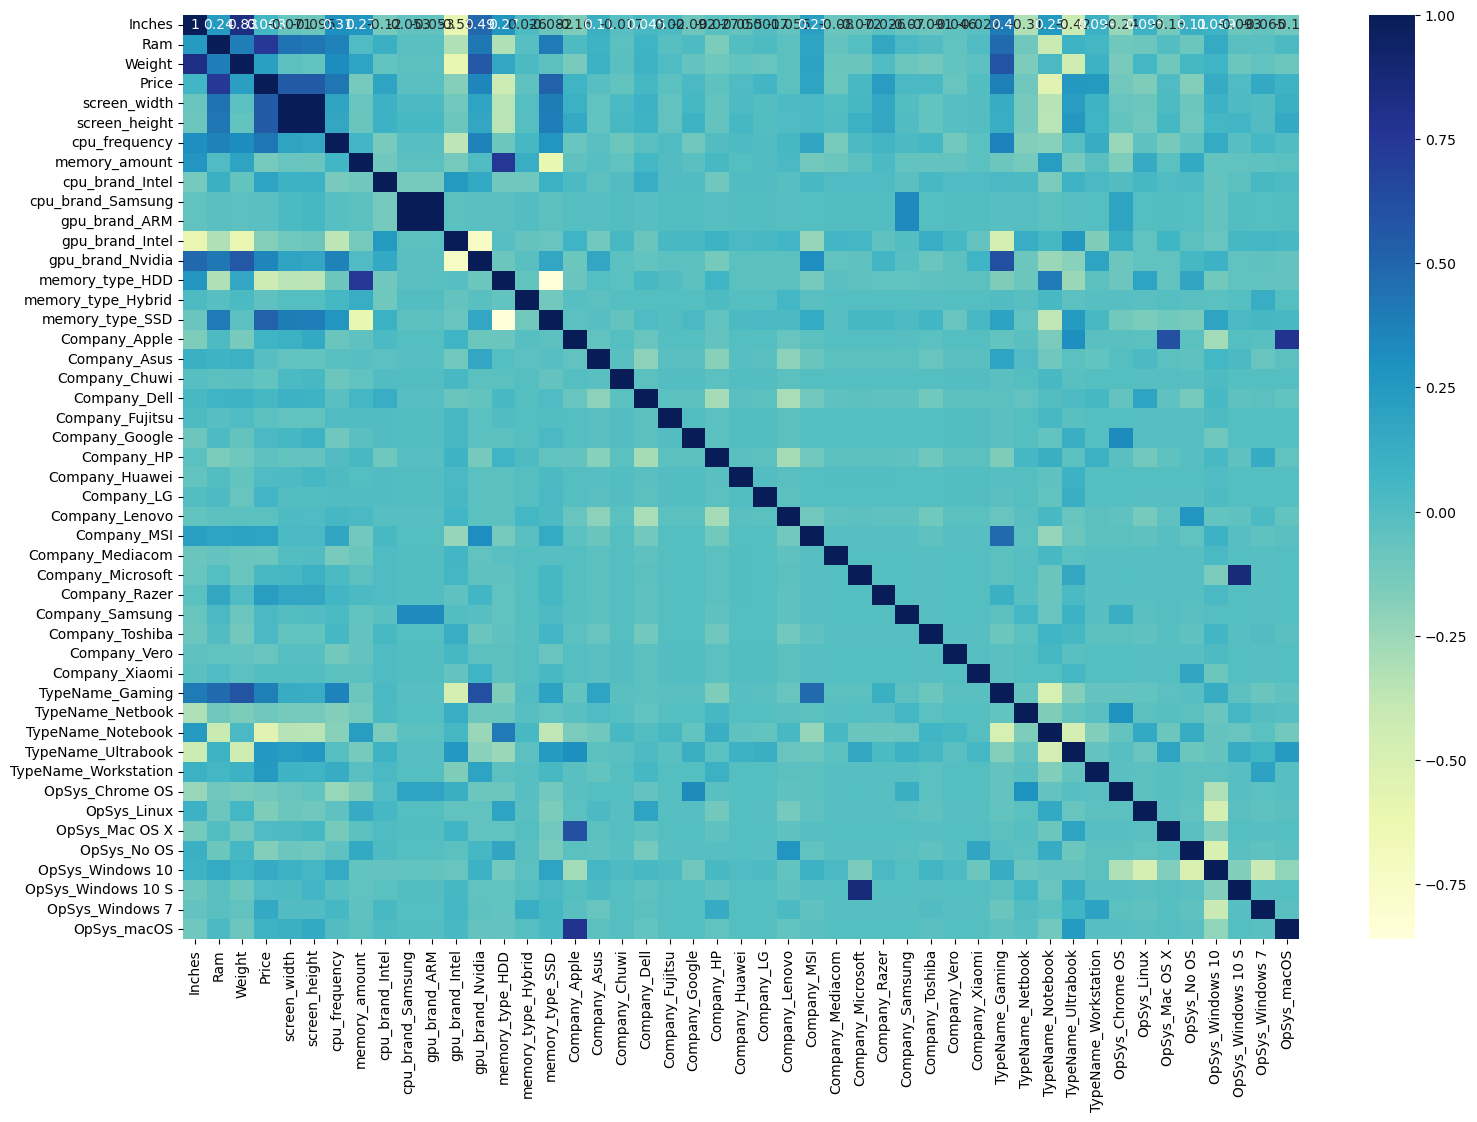

In [25]:
# tabular format isn't really intuitive or readable
# Visualize correlations on heatmap
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

In [26]:
# Take absolute values of correlations and sort in descinding order
corr = df.corrwith(df['Price'])
abs_corr = corr.abs().sort_values(ascending=False)
abs_corr


Price                   1.000000
Ram                     0.743007
screen_width            0.556529
screen_height           0.552809
TypeName_Notebook       0.549248
memory_type_SSD         0.513609
cpu_frequency           0.430293
memory_type_HDD         0.426121
TypeName_Gaming         0.375789
gpu_brand_Nvidia        0.348797
TypeName_Ultrabook      0.255658
TypeName_Workstation    0.249752
Company_Razer           0.233756
Weight                  0.210370
gpu_brand_Intel         0.184205
cpu_brand_Intel         0.181127
Company_MSI             0.180100
OpSys_No OS             0.177094
OpSys_Linux             0.162060
OpSys_Windows 7         0.152381
OpSys_Windows 10        0.137048
memory_amount           0.122365
OpSys_Chrome OS         0.118684
TypeName_Netbook        0.097572
OpSys_macOS             0.089928
Company_Mediacom        0.087161
Company_Apple           0.080688
Company_Vero            0.071972
Inches                  0.068197
Company_LG              0.067053
Company_Ch

<Axes: >

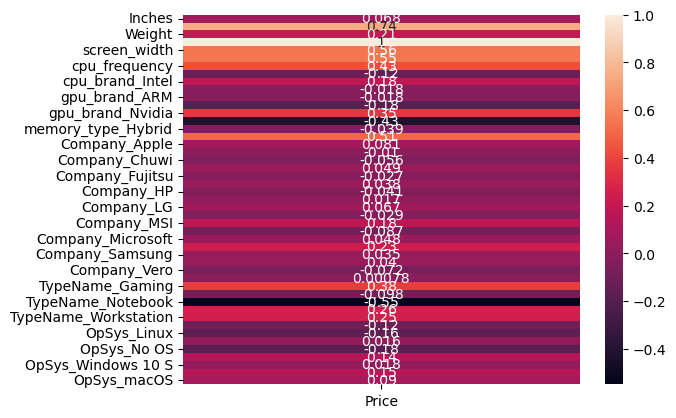

In [27]:
#Correlation to Target Variable
corr = df.corr()[['Price']]
sns.heatmap(corr, annot=True)

<Axes: >

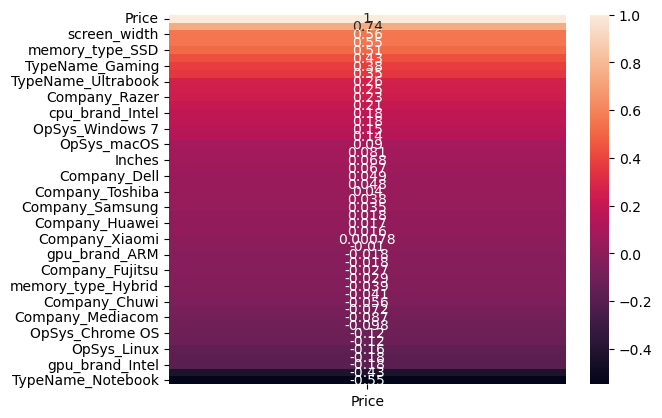

In [28]:
#Sort Correlation Coefficients
corr = df.corr()[['Price']].sort_values(by='Price', ascending=False)
sns.heatmap(corr, annot=True)


In [29]:
# Filter absolute correlation values by threshold
selected_features = abs_corr[abs_corr > 0.1]
selected_features

Price                   1.000000
Ram                     0.743007
screen_width            0.556529
screen_height           0.552809
TypeName_Notebook       0.549248
memory_type_SSD         0.513609
cpu_frequency           0.430293
memory_type_HDD         0.426121
TypeName_Gaming         0.375789
gpu_brand_Nvidia        0.348797
TypeName_Ultrabook      0.255658
TypeName_Workstation    0.249752
Company_Razer           0.233756
Weight                  0.210370
gpu_brand_Intel         0.184205
cpu_brand_Intel         0.181127
Company_MSI             0.180100
OpSys_No OS             0.177094
OpSys_Linux             0.162060
OpSys_Windows 7         0.152381
OpSys_Windows 10        0.137048
memory_amount           0.122365
OpSys_Chrome OS         0.118684
dtype: float64

In [30]:
#new DataFrame from selected feature
new_df = df.filter(items = selected_features.index)
new_df

,Price,Ram,screen_width,screen_height,TypeName_Notebook,memory_type_SSD,cpu_frequency,memory_type_HDD,TypeName_Gaming,gpu_brand_Nvidia,...,Weight,gpu_brand_Intel,cpu_brand_Intel,Company_MSI,OpSys_No OS,OpSys_Linux,OpSys_Windows 7,OpSys_Windows 10,memory_amount,OpSys_Chrome OS
0,1339.69,8,2560,1600,0,1,2.3,0,0,0,...,1.37,1,1,0,0,0,0,0,128000.0,0
1,898.94,8,1440,900,0,0,1.8,0,0,0,...,1.34,1,1,0,0,0,0,0,128000.0,0
2,575.00,8,1920,1080,1,1,2.5,0,0,0,...,1.86,1,1,0,1,0,0,0,256000.0,0
3,2537.45,16,2880,1800,0,1,2.7,0,0,0,...,1.83,0,1,0,0,0,0,0,512000.0,0
4,1803.60,8,2560,1600,0,1,3.1,0,0,0,...,1.37,1,1,0,0,0,0,0,256000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,638.00,4,1920,1080,0,1,2.5,0,0,0,...,1.80,1,1,0,0,0,0,1,128000.0,0
1299,1499.00,16,3200,1800,0,1,2.5,0,0,0,...,1.30,1,1,0,0,0,0,1,512000.0,0
1300,229.00,2,1366,768,1,0,1.6,0,0,0,...,1.50,1,1,0,0,0,0,1,64000.0,0
1301,764.00,6,1366,768,1,0,2.5,1,0,0,...,2.19,0,1,0,0,0,0,1,1000000.0,0


In [31]:
new_df.columns

Index(['Price', 'Ram', 'screen_width', 'screen_height', 'TypeName_Notebook',
       'memory_type_SSD', 'cpu_frequency', 'memory_type_HDD',
       'TypeName_Gaming', 'gpu_brand_Nvidia', 'TypeName_Ultrabook',
       'TypeName_Workstation', 'Company_Razer', 'Weight', 'gpu_brand_Intel',
       'cpu_brand_Intel', 'Company_MSI', 'OpSys_No OS', 'OpSys_Linux',
       'OpSys_Windows 7', 'OpSys_Windows 10', 'memory_amount',
       'OpSys_Chrome OS'],
      dtype='object')

In [32]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Price                 1303 non-null   float64
 1   Ram                   1303 non-null   int32  
 2   screen_width          1303 non-null   int32  
 3   screen_height         1303 non-null   int32  
 4   TypeName_Notebook     1303 non-null   int32  
 5   memory_type_SSD       1303 non-null   int32  
 6   cpu_frequency         1303 non-null   float64
 7   memory_type_HDD       1303 non-null   int32  
 8   TypeName_Gaming       1303 non-null   int32  
 9   gpu_brand_Nvidia      1303 non-null   int32  
 10  TypeName_Ultrabook    1303 non-null   int32  
 11  TypeName_Workstation  1303 non-null   int32  
 12  Company_Razer         1303 non-null   int32  
 13  Weight                1303 non-null   float32
 14  gpu_brand_Intel       1303 non-null   int32  
 15  cpu_brand_Intel      

<Axes: >

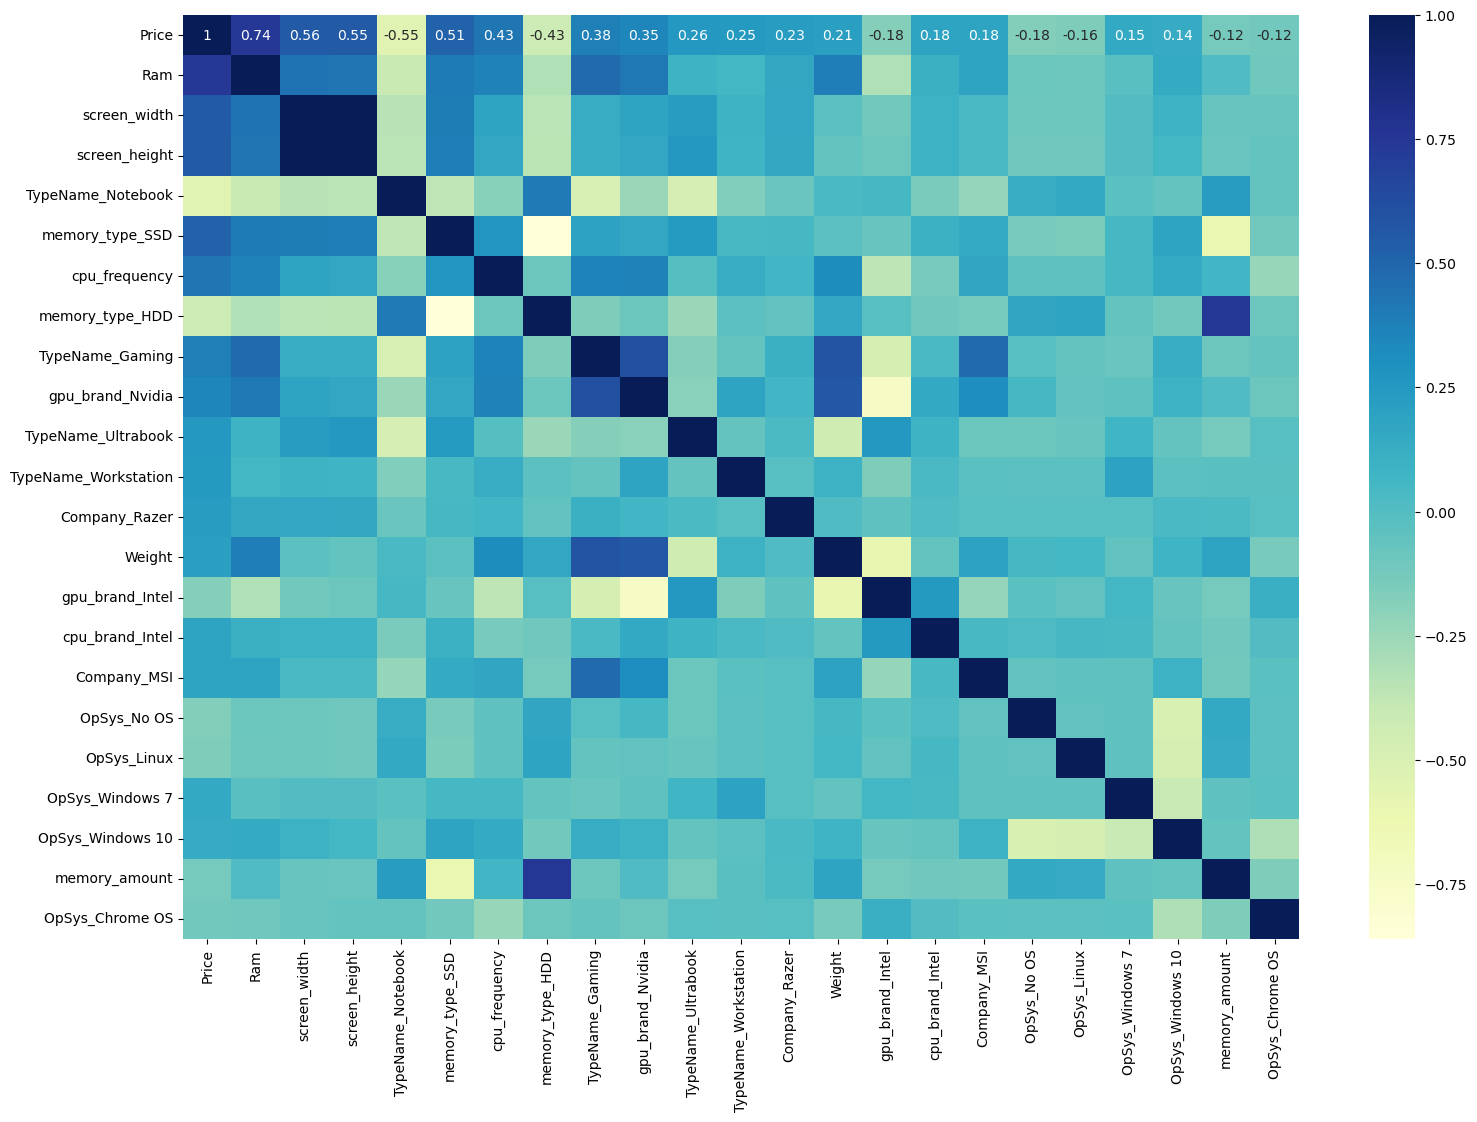

In [33]:
# Visualize correlations on heatmap of new dataframe
plt.figure(figsize=(18,12))
sns.heatmap(new_df.corr(), annot=True, cmap='YlGnBu')

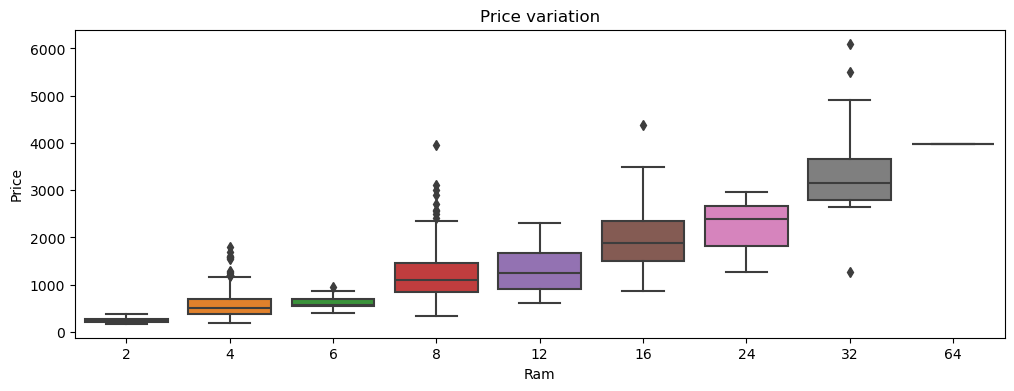

In [34]:
fig = plt.figure(figsize = (12,4))
sns.boxplot(x = new_df['Ram'], y = new_df["Price"])
plt.title("Price variation")
plt.show()

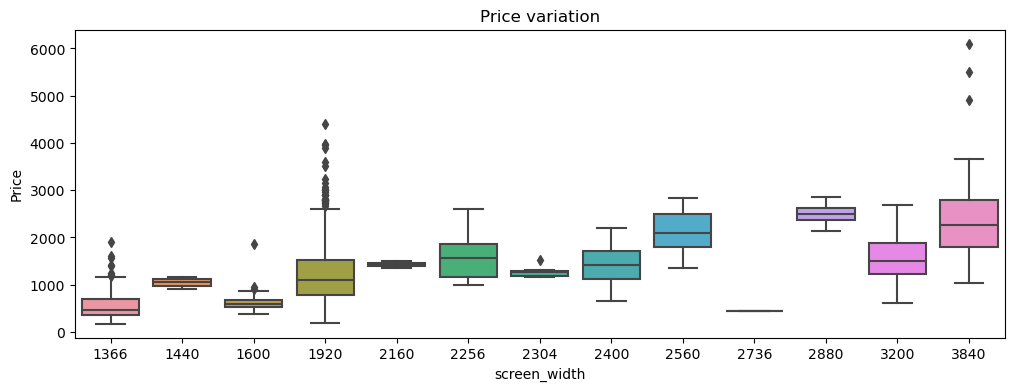

In [35]:
fig = plt.figure(figsize = (12,4))
sns.boxplot(x = new_df['screen_width'], y = new_df["Price"])
plt.title("Price variation")
plt.show()

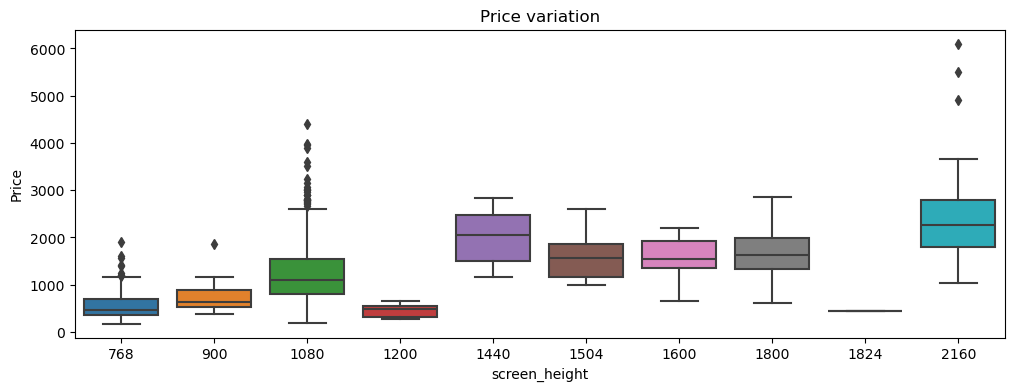

In [36]:
fig = plt.figure(figsize = (12,4))
sns.boxplot(x = new_df['screen_height'], y = new_df["Price"])
plt.title("Price variation")
plt.show()

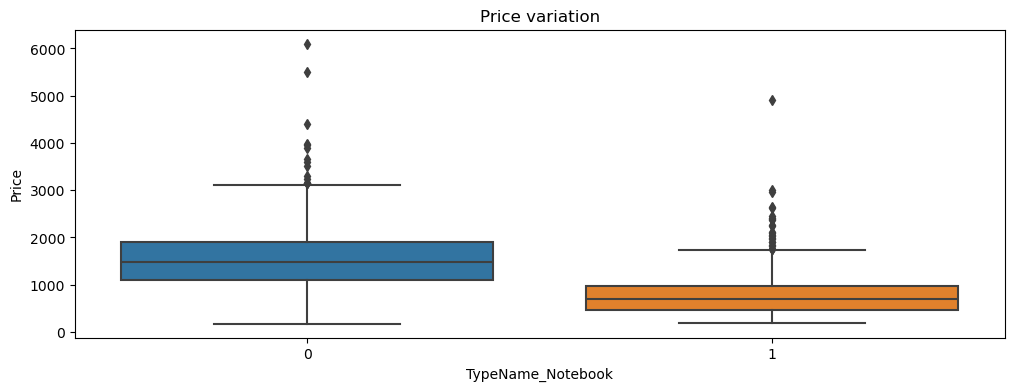

In [37]:
fig = plt.figure(figsize = (12,4))
sns.boxplot(x = new_df['TypeName_Notebook'], y = new_df["Price"])
plt.title("Price variation")
plt.show()

In [38]:
df_num = new_df[['Price', 'cpu_frequency','Ram', 'screen_width', 'screen_height', 'memory_amount', 'Weight']]
df_num

,Price,cpu_frequency,Ram,screen_width,screen_height,memory_amount,Weight
0,1339.69,2.3,8,2560,1600,128000.0,1.37
1,898.94,1.8,8,1440,900,128000.0,1.34
2,575.00,2.5,8,1920,1080,256000.0,1.86
3,2537.45,2.7,16,2880,1800,512000.0,1.83
4,1803.60,3.1,8,2560,1600,256000.0,1.37
...,...,...,...,...,...,...,...
1298,638.00,2.5,4,1920,1080,128000.0,1.80
1299,1499.00,2.5,16,3200,1800,512000.0,1.30
1300,229.00,1.6,2,1366,768,64000.0,1.50
1301,764.00,2.5,6,1366,768,1000000.0,2.19


C:\Users\helen\anaconda3\anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


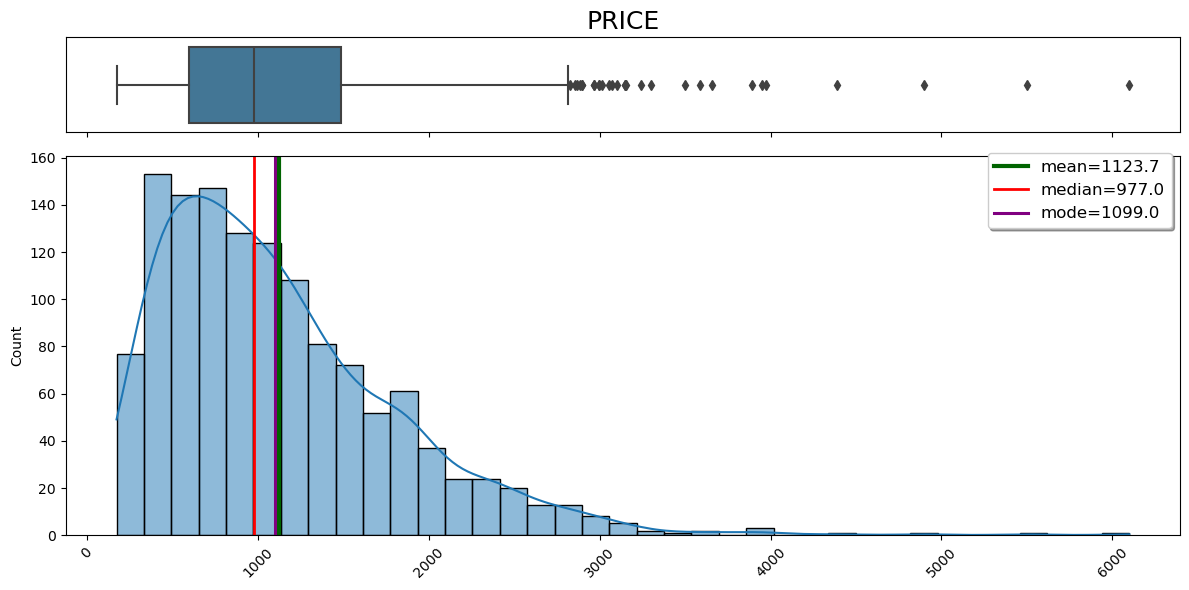

C:\Users\helen\anaconda3\anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


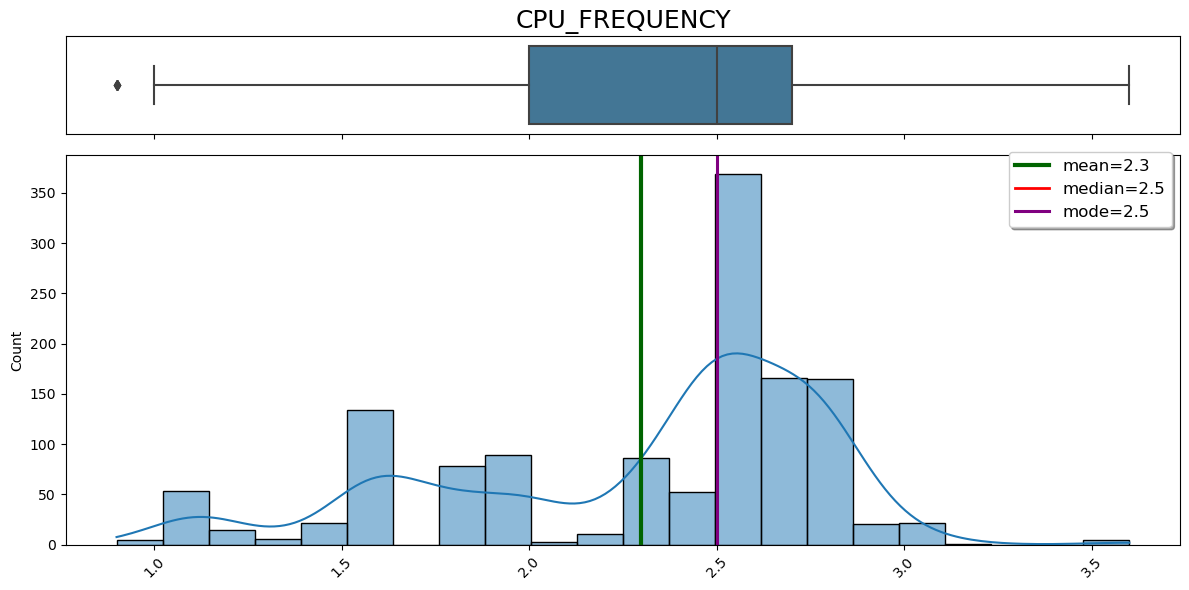

C:\Users\helen\anaconda3\anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


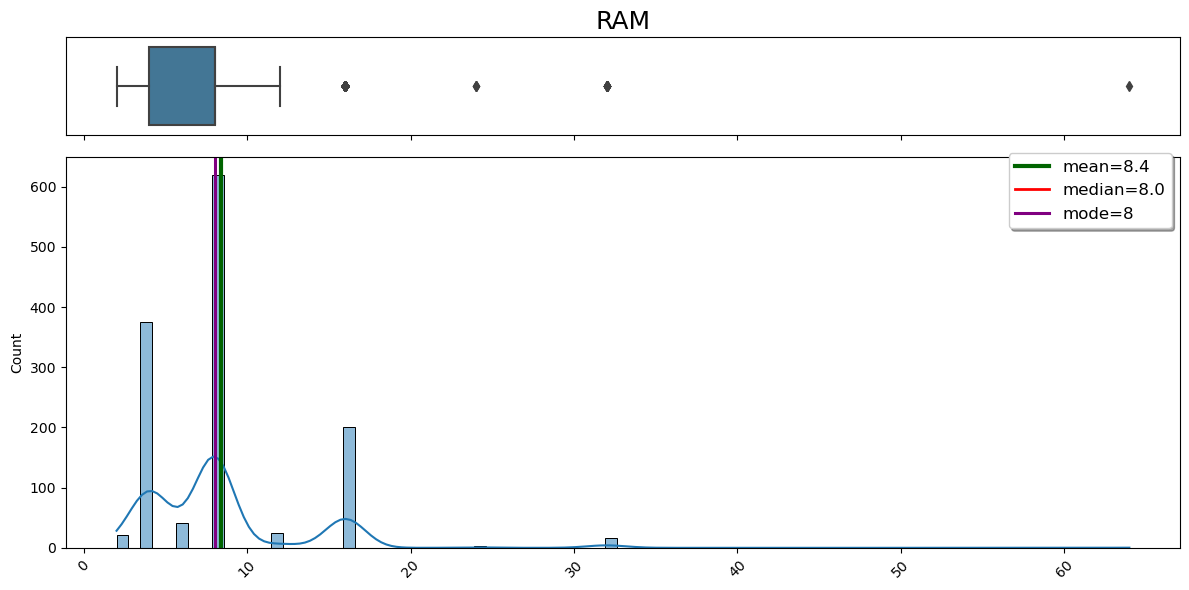

C:\Users\helen\anaconda3\anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


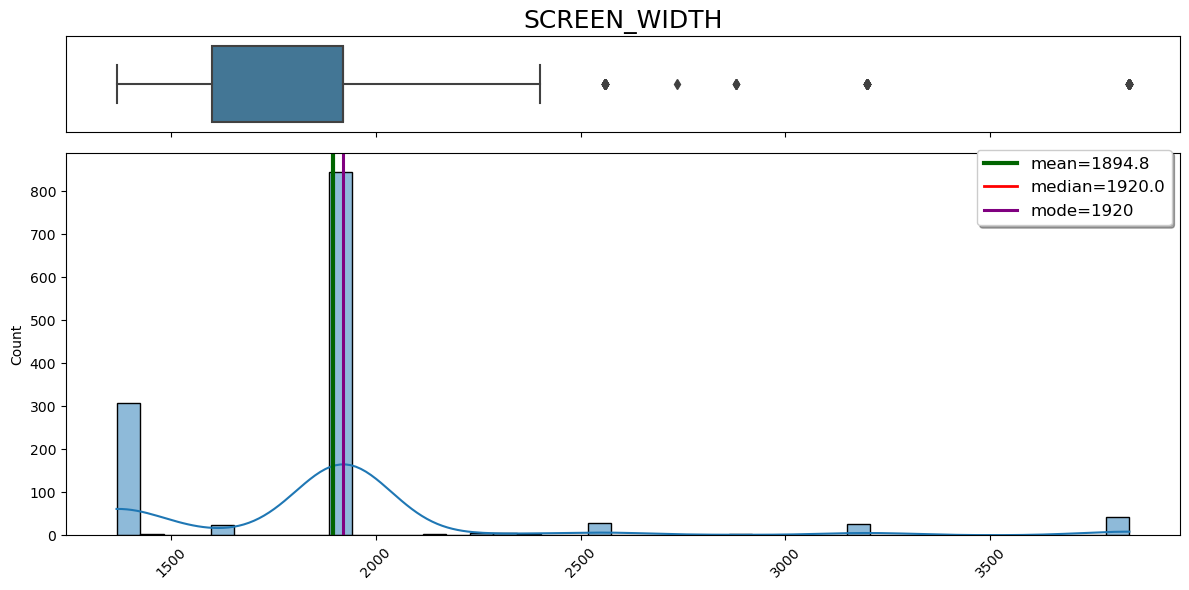

C:\Users\helen\anaconda3\anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


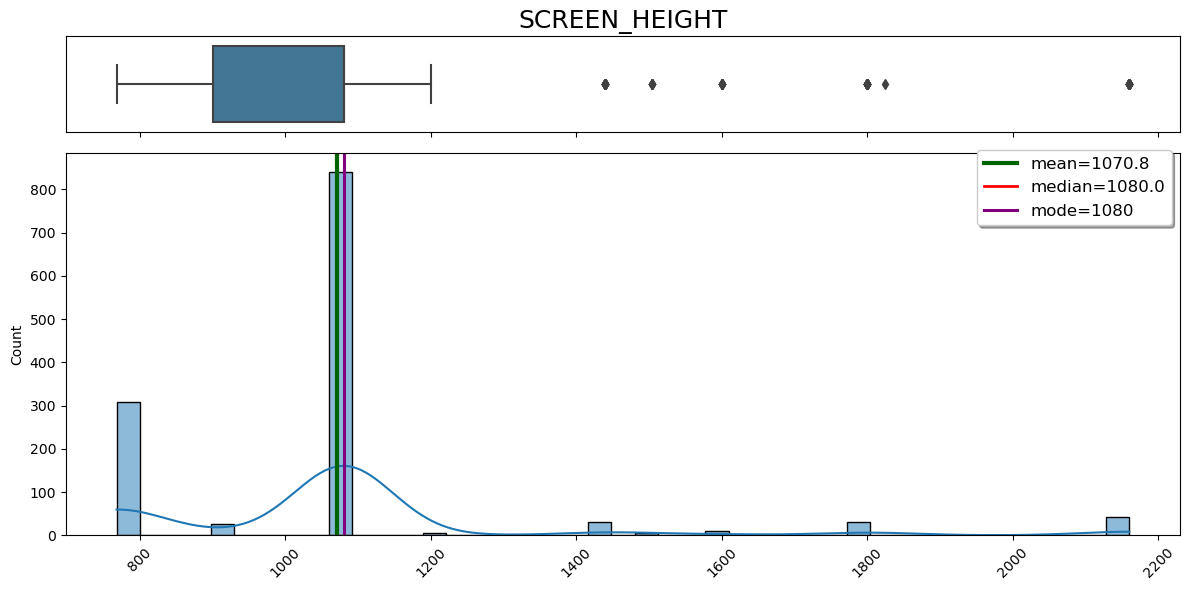

C:\Users\helen\anaconda3\anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


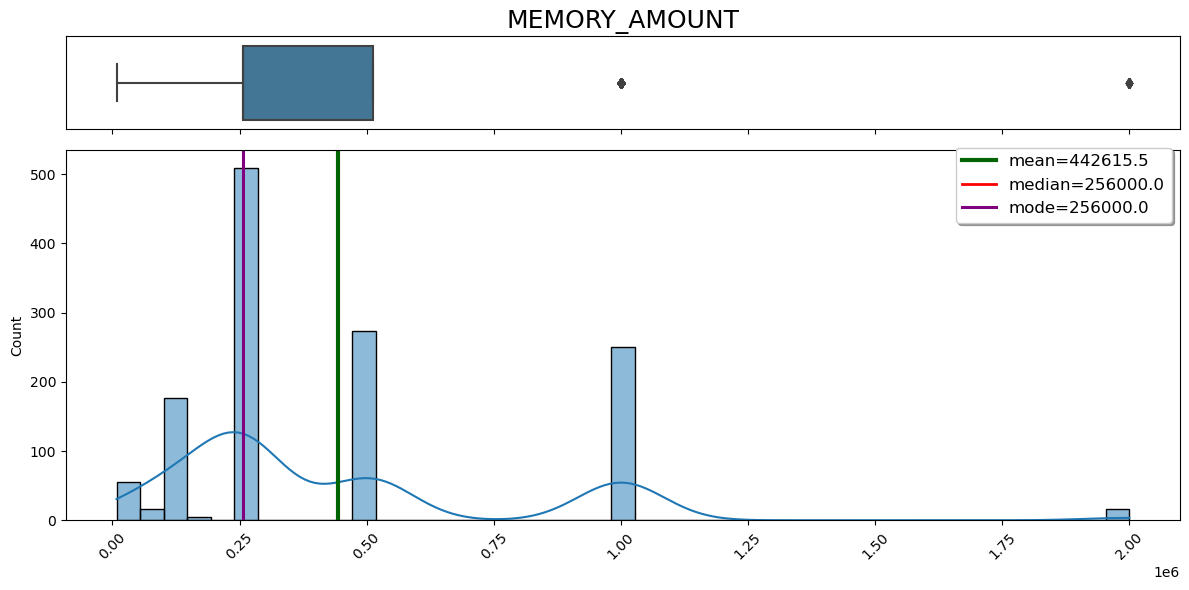

C:\Users\helen\anaconda3\anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


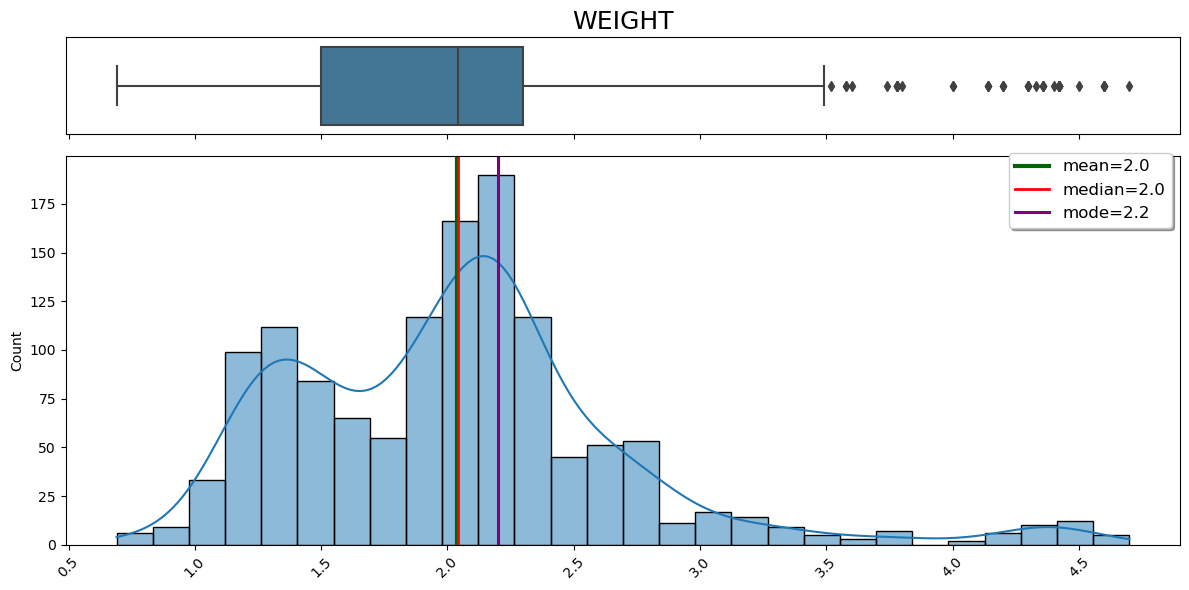

In [39]:
for i in df_num.columns:
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(12,6),gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(i.upper(),fontsize=18)
    sns.boxplot(x=df_num[i], data=df_num, ax=ax[0],  palette='mako_r')
    ax[0].set_xlabel('')
    ax[0].set(yticks=[])
    sns.histplot(df_num[i],kde=True)
    plt.xticks(rotation=45)
    ax[1].set_xlabel('')
    plt.axvline(df_num[i].mean(), color='darkgreen', linewidth=3, label='mean=' + str(np.round(df_num[i].mean(),1)))
    plt.axvline(df_num[i].median(), color='red', linewidth=2, label='median='+ str(np.round(df_num[i].median(),1)))
    plt.axvline(df_num[i].mode()[0], color='purple', linewidth=2.2, label='mode='+ str(df_num[i].mode()[0]))
    plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=12, fancybox=True, shadow=True, frameon=True)
    plt.tight_layout()
    plt.show()
    print('\n\n')

In [40]:
# Spliting the dataset into independent and dependent variables

# Independent variables
X = new_df.drop(columns=["Price"]).values

# Dependent variables
y = new_df["Price"].values
# print(X, y)

In [87]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

# Split the dataset (X, y) into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

# Display rows and columns
#X.shape, y.shape, X_train.shape, X_test.shape

In [88]:
# Display the rows and columns (dimenions) of an unsplitted dataset
print('Total number of rows and columns for the complete dataset: ', X.shape, y.shape)

# Display the rows and columns (dimenions) of the splitted dataset
print('Number of rows and columns after splitting dataset: ', X_train.shape, X_test.shape, y_train.shape, y_test.shape )

Total number of rows and columns for the complete dataset:  (1303, 22) (1303,)
Number of rows and columns after splitting dataset:  (1042, 22) (261, 22) (1042,) (261,)


In [89]:
# Feature Scaling to bring the variable in a single scale
from sklearn.preprocessing import StandardScaler

# Create an initialise an object sc by calling a method StandardScaler()
sc = StandardScaler()

# Train the model by calling a method fit_transform
X_train_scaled = sc.fit_transform(X_train)

# Store the transformed data into X_test
X_test_scaled = sc.transform(X_test)

#print(X_train_scaled)

In [90]:
from sklearn.svm import SVR
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [92]:
svr = SVR(kernel='linear') ##change the kernel type to be used in the algorith Linear instead rbf we ca see a improviment of acurracy.
svr.fit(X_train_scaled, y_train)

# make prediction 
y_pred = svr.predict(X_test_scaled)

# model evaluation R² and MSE 
r2 = r2_score(y_test, y_pred)
print('R2 score:', r2)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

R2 score: 0.6935206462758179
Mean Squared Error: 146507.28156957857


test(0.20) > R2 score: 0.7438753529021788
test(0.25) > R2 score: 0.698205132988984 - Mean Squared Error: 160505.27175493186
test(0.30) > R2 score: 0.6959153395470743 - Mean Squared Error: 162831.21546469326

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [70]:
# Criar e treinar o regressor linear
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

# Fazer previsões nos dados de teste
y_pred = regressor.predict(X_test_scaled)

# evaluation model using R² and MSE 
r2 = r2_score(y_test, y_pred)
print('R2 score:', r2)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

R2 score: 0.7560628591936389
Mean Squared Error: 130623.42926249253


test(0.20) > R2 score: 0.7550765826959841 - Mean Squared Error: 120221.34454829081
test(0.25) > R2 score: 0.7380182022334452 - 
Mean Squared Error: 139331.2618661325
test(0.30)  R2 score: 0.7560628591936389 - 
Mean Squared Error: 130623.4292624925>

In [71]:
###Random forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Initialize a model
model = RandomForestRegressor()

# Train the model with the scaled train dataset
model.fit(X_train_scaled, y_train)

# make prediction of data test
y_pred = regressor.predict(X_test_scaled)

# # evaluation model using R² and MSE 
r2 = r2_score(y_test, y_pred)
print('R2 score:', r2)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


R2 score: 0.7560628591936389
Mean Squared Error: 130623.42926249253


test(0.20) > R2 score: 0.7526392865692046 - Mean Squared Error: 125641.0675368528
test(0.25) > R2 score: 0.7380182022334452 - Mean Squared Error: 139331.2618661325
test(0.30) > R2 score: 0.7560628591936389 - Mean Squared Error: 130623.42926249253